In [594]:
from __future__ import division, print_function, unicode_literals

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10
import seaborn as sns

import itertools as it
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.metrics import r2_score


import itertools as it
from itertools import combinations

import scipy as sp


# to make this notebook's output stable across runs
np.random.seed(42)
%matplotlib inline

In [595]:
#We begin with a simple ridge regression implementation

In [596]:
class RidgeRegression():
    def __init__(self, iterations=1000, alpha=1, lmbda=0.1):
        self.iterations = iterations
        self.alpha = alpha
        if(lmbda > 100):
            self.lmbda = int(lmbda)
        else:
            self.lmbda = lmbda
        
    
    def gradient_descent(self, X, y, w, iterations, alpha, lmbda):
        #Using set amount of iterations for the gradient descent
        m = X.shape[0]
        
        
        for i in range(iterations):
            w = w - (alpha / m) * (np.dot(X.T, (X.dot(w) - y[:, np.newaxis])) + lmbda * w)
            
        return w
    
    def fit(self, X, y):
        #To fit the model
        Xn = np.ndarray.copy(X)
        yn = np.ndarray.copy(y)
        
        w = np.zeros((Xn.shape[1] + 1, 1))
        
        #Normalizing X
        self.X_mean = np.mean(Xn, axis=0)
        self.X_std = np.std(Xn, axis=0)
        Xn -= self.X_mean
        self.X_std[self.X_std == 0] = 1
        Xn /= self.X_std
        
        self.y_mean = yn.mean(axis=0)
        yn -= self.y_mean
        
        #Creating intercept term
        Xn = np.hstack((np.ones(Xn.shape[0])[np.newaxis].T, Xn))
        
        self.w = self.gradient_descent(Xn, yn, w, self.iterations, self.alpha, self.lmbda)
        
    def predictRegression(self, X):
        Xn = np.ndarray.copy(X)
        
        Xn -= self.X_mean
        Xn /= self.X_std
        Xn = np.hstack((np.ones(Xn.shape[0])[np.newaxis].T, Xn))
        
        return Xn.dot(self.w) + self.y_mean
        

In [597]:
'''
 Testing model on a DataFrame containing Financial predictions for a small Brazilian logistics company
 The final column represents actual order counts
''' 

'\n Testing model on a DataFrame containing Financial predictions for a small Brazilian logistics company\n The final column represents actual order counts\n'

In [613]:
data = pd.read_csv('demand.csv', sep=';')
data.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [614]:
#Getting rid of timeframes and setting affected area as target y
#Also clearing row 0 as it contains labels
y = data['Target (Total orders)']
X = data.drop(['Target (Total orders)'], axis=1)

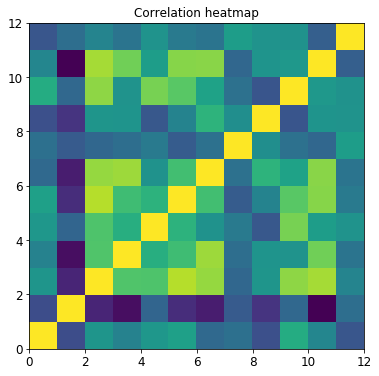

In [615]:
#Representing a correlation heat map
corr_matrix = np.corrcoef(X.T)
pd.DataFrame(corr_matrix)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.pcolor(corr_matrix)
ax.set_title('Correlation heatmap')
plt.show()

In [616]:
#There seems to be no visible reduction in the number of useful predictors in this data set

In [617]:
X = X.astype(np.double)
y = y.astype(np.double)
X = X.values
y = y.values

In [618]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [619]:
ridge = RidgeRegression(iterations=4000, alpha=0.01, lmbda=0.1)
ridge.fit(X_train, y_train)

In [620]:
predicts = ridge.predictRegression(X_test)

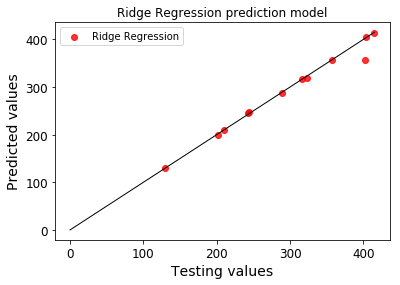

In [621]:
plt.scatter(y_test, predicts, color='r', alpha=0.8, label='Ridge Regression')
plt.plot([0, max(y_test)], [0, max(y_test)], 'k-', lw=1)
plt.xlabel('Testing values')
plt.ylabel('Predicted values')
plt.title('Ridge Regression prediction model')
plt.legend()
plt.show()

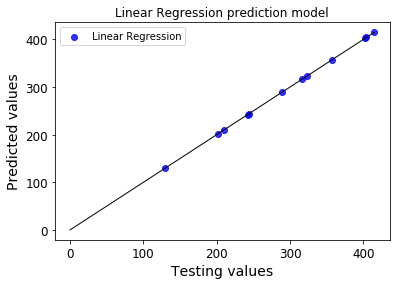

In [622]:
from sklearn.linear_model import LinearRegression  
#We compare this to a simple linear regression fit
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linear_predicts = linreg.predict(X_test)

#Plot the results
plt.scatter(y_test, linear_predicts, color='b', alpha=0.8, label='Linear Regression')
plt.plot([0, max(y_test)], [0, max(y_test)], 'k-', lw=1)
plt.xlabel('Testing values')
plt.ylabel('Predicted values')
plt.title('Linear Regression prediction model')
plt.legend()
plt.show()

In [623]:
print("R^2 score for Ridge Regression: ", r2_score(y_test, predicts))
print("R^2 score for Linear Regression: ", r2_score(y_test, linear_predicts))

R^2 score for Ridge Regression:  0.9775736845771431
R^2 score for Linear Regression:  1.0


In [624]:
#We can conclude the model works well enough, now it's time to focus on optimizing the lambda choice using R^2

In [625]:
lambda_min = -4
lambda_max = 4
num_lambdas = 16
num_predictors = X.shape[1]
lambdas = np.linspace(lambda_min, lambda_max, num_lambdas)

r_squared = np.zeros(num_lambdas)

for ind, i in enumerate(lambdas):    
    # Fit ridge regression on train set
    reg = RidgeRegression(alpha=0.001, lmbda=10**i)
    reg.fit(X_train, y_train)
    y_pred = reg.predictRegression(X_test)

    # Evaluate train & test performance
    r_squared[ind] = r2_score(y_test, y_pred)


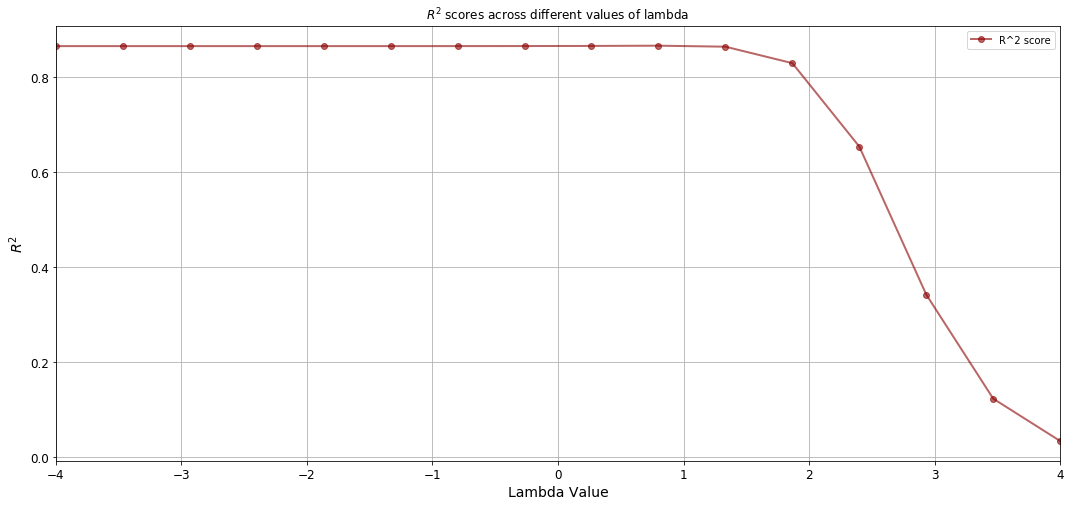

In [626]:
#Time to plot the results
plt.figure(figsize = (18, 8))
plt.plot(lambdas, r_squared, 'bo-', label='R^2 score', color='darkred', alpha=0.6, linewidth=2)
plt.xlabel('Lambda Value'); plt.ylabel(r'$R^2$')
plt.xlim(lambda_min, lambda_max)
plt.title('$R^2$ scores across different values of lambda')
plt.legend(loc='best')
plt.grid()

In [627]:
#We can determine the best lambda range to end roughly by 0.8 with little variation before that

In [ ]:
'''
 In this case, the data allowed the construction of a very precise model.
 This is due to a very robust relation between predictors (order statistics directly translate to actual sales)
'''